In [4]:
from model import ParticleClassifier
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [5]:
classifier = ParticleClassifier()\
                .load_data('data/toy_data.csv')\
                .train_test_split()\
                .pre_proc_images(train=True, test=True)\
                .one_hot_encode_labels(train=True, test=True)\
                .train_model()\
                .evaluate_model()\

Data loaded into self.images, self.labels
Split into self.images_train, self.images_test, self.labels_train, self.labels_test
Train and test labels encoded into self.y_train and self.y_test
Train on 1920 samples, validate on 480 samples
Epoch 1/10
1920/1920 [==============================] - 7s 4ms/sample - loss: 0.6428 - acc: 0.7083 - val_loss: 0.3345 - val_acc: 0.8875
Epoch 2/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.3443 - acc: 0.8661 - val_loss: 0.2738 - val_acc: 0.8917
Epoch 3/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.2496 - acc: 0.9021 - val_loss: 0.2669 - val_acc: 0.9000
Epoch 4/10
1920/1920 [==============================] - 6s 3ms/sample - loss: 0.2314 - acc: 0.9094 - val_loss: 0.2589 - val_acc: 0.9083
Epoch 5/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.2348 - acc: 0.9109 - val_loss: 0.3029 - val_acc: 0.8833
Epoch 6/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.215

Train and test labels encoded into self.y_train and self.y_test
Labels: [215 204 181] 
 Original Predictions: [212 200 188] 
 Attacked Predictions: [  0 183 417]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       1.00      0.92      0.96       200
           2       0.45      1.00      0.62       188

    accuracy                           0.62       600
   macro avg       0.48      0.64      0.53       600
weighted avg       0.47      0.62      0.51       600



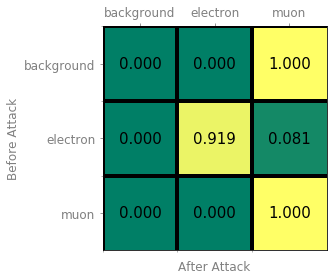

In [6]:
# Random neutron (2,2) attack
value =  np.mean([classifier.images.max(), classifier.images.mean()])
classifier = classifier.apply_attack(classifier.add_hot_area, size=(2,2), value=value)\
                       .pre_proc_images(attacked=True, filters=False)\
                       .one_hot_encode_labels(attacked=True)\
                       .evaluate_attack()

In [ ]:
# Hot pixel attack
classifier.hot_pixel_attack()\
          .pre_proc_images(attacked=True)\
          .one_hot_encode_labels(attacked=True)\
          .evaluate_attack()

In [ ]:
pred = classifier.predictions
pred1 = classifier.attacked_predictions
print(pred)
classifier.generate_confusion_matrix(pred, pred1)

In [ ]:
tf.math.confusion_matrix(classifier.predictions, classifier.attacked_predictions)

In [ ]:
cm = confusion_matrix(classifier.predictions, classifier.attacked_predictions).astype(np.float)
print(cm)
for i in range(len(cm)):
    cm[i,:] = cm[i,:]/cm[i,:].sum()
plt.rcParams.update({'axes.labelsize': 12,
                     'axes.labelcolor': 'gray',
                     'xtick.color': 'gray',
                     'ytick.color': 'gray',
                     'xtick.labelsize': 12,
                     'ytick.labelsize': 12})
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='summer')
ax.set_xlabel('Before Attack')
ax.set_ylabel('After Attack')
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(['0', '1', '2'])
ax.set_yticklabels(['0', '1', '2'])
ax.set_xticks(np.arange(3)-0.5, minor=True)
ax.set_yticks(np.arange(3)-0.5, minor=True)

for i in range(len(cm)):
    for j in range(len(cm[0])):
        text = ax.text(j, i, '%.3f'%cm[i, j], ha='center', va='center', color='black', size=15)
ax.grid(which="minor", color="black", linestyle='-', linewidth=4)
fig.tight_layout()


In [ ]:
classifier.print_image(18, [classifier.x_attacked, classifier.x_test)

In [ ]:
classifier.model.predict(np.reshape(classifier.x_attacked[18], (1,50,50,1)))

In [ ]:
n = 1
electron_images = classifier.images[classifier.labels == 1]
muon_images = classifier.images[classifier.labels == 2]
classifier.print_image(n, electrons, save='img/electron01.png')
classifier.print_image(n, muons, save='img/muon01.png')

In [ ]:
value =  np.mean([classifier.images.max(), classifier.images.mean()])
electron_attacked = electron_images[n, :, :, 0].copy()
#electron_attacked[11:12, 2:6] = value
electron_attacked[11:12, 9:14] = value
plt.imshow(electron_attacked)
plt.imsave('img/electron01_neutron.png', electron_attacked)
electron_attacked = np.reshape(electron_attacked, (1, 50, 50, 1))
x = classifier.pre_proc(electron_attacked)
print(np.argmax(classifier.model.predict(x)))

In [ ]:
value =  np.mean([classifier.images.max(), classifier.images.mean()])
muon_attacked = muon_images[n, :, :, 0].copy()
#electron_attacked[11:12, 2:6] = value
muon_attacked[18:21, 2:5] = value
plt.imshow(muon_attacked)
plt.imsave('img/muon01_neutron.png', muon_attacked)
muon_attacked = np.reshape(muon_attacked, (1, 50, 50, 1))
x = classifier.pre_proc(muon_attacked)
print(np.argmax(classifier.model.predict(x)))

In [ ]:
print(electron_images.shape)
size = (1, 6)
images = electron_images.copy()
images = images.reshape(len(images), 2500)
argmax = np.argmax(images, 1)
pos = [list(np.unravel_index(i, (50,50))) for i in argmax]
for xy in pos:
    if 50-xy[0] < size[0]:
        xy[0] -= size[0]
    if 50-xy[1] < size[1]:
        xy[1] -=size[1]
pos = np.reshape(pos, (2, -1))

In [ ]:
plt.imshow(electron_images[0,:,:,0])